## 1º Carga de archivos y unión Dataframes 

In [16]:
import pandas as pd

# Cargar los dos archivos de MovieLens
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

#Unir archivos
df_movielens_unido = pd.merge(df_movies, df_ratings, on='movieId', how='inner')

# Verificar el resultado
print("Información del DataFrame unido:")
print(df_movielens_unido.info())    

Información del DataFrame unido:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
None


In [17]:
# Guardar el resultado en movielens_unido.csv 
df_movielens_unido.to_csv('movielens_unido.csv', index=False)


### Exploración rápida

In [19]:
df.head()



NameError: name 'df' is not defined

## 2º Limpieza de datos

In [20]:
import pandas as pd

# 1. Cargar el archivo unido
df = pd.read_csv('movielens_unido.csv')

# 2. Convertir la columna 'timestamp' a formato de fecha
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# 3. Eliminar columnas que no vas a usar
df = df.drop(columns=['timestamp'])
print(df.info())

# 5. Guardar el archivo como movielens_limpio.csv 
df.to_csv('movielens_limpio.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB
None


### 2.1º Duplicados

In [21]:
#Buscamos duplicados en todas las columnas

df.drop_duplicates()


,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


##### *El conjunto de datos de MovieLens está muy limpio y que no hay entradas idénticas,lo que es una buena señal para la calidad de los datos.

### Añadir columnas para cumplir con los requisitos del proyecto


In [27]:
import pandas as pd
import re
# expresiones regulares ,encontrar el año dentro del titulo.

df_limpio = pd.read_csv('movielens_limpio.csv')

df_explode = df_limpio.explode('genres')

# Obtenemos las variables "dummy" para los géneros
dummies_generos = pd.get_dummies(df_explode['genres'], prefix='genre', dtype=int)

# Unir las nuevas columnas 
df_limpio_con_dummies = pd.concat([df_explode, dummies_generos], axis=1)

# Eliminar la columna de géneros original 
df_limpio_con_dummies = df_limpio_con_dummies.drop(columns='genres')

df_limpio_con_dummies['year'] = df_limpio_con_dummies['title'].str.extract(r'\((\d{4})\)').astype(float)


print("\nNúmero total de columnas:")
print(len(df_limpio_con_dummies.columns))
# Save the new DataFrame to a CSV file
df_limpio_con_dummies.to_csv('movielens_limpio_con_dummies.csv', index=False)


Número total de columnas:
956


Necesitaba crear más columnas,la columna de 'genres' es la mejor opcion.Use explode,para separar cada género en filas individuales.Luego usé pd.get_dummies para transformar la columna de texto en un formato binario 1 si es cierto,0 si es falso.

## 3º Análisis estadístico


In [ ]:
import pandas as pd


df_limpio = pd.read_csv('movielens_limpio.csv')

# Generos separados
df_limpio['genres'] = df_limpio['genres'].apply(lambda x: x.split('|'))
df_explode = df_limpio.explode('genres')

# Cantidad de votos por cada género
conteo_generos = df_explode['genres'].value_counts()

# Mostrar los 10 géneros más votados
top_10_generos = conteo_generos.head(10)
print("\nLos 10 géneros más votados:")
print(top_10_generos)


Los 10 géneros más votados:
genres
Drama        41928
Comedy       39053
Action       30635
Thriller     26452
Adventure    24161
Romance      18124
Sci-Fi       17243
Crime        16681
Fantasy      11834
Children      9208
Name: count, dtype: int64


In [5]:
df.columns

NameError: name 'df' is not defined

### Columnas númericas

In [22]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
movieId,100836.0,19435.30,35530.99,1.0,1199.0,2991.0,8122.0,193609.0
userId,100836.0,326.13,182.62,1.0,177.0,325.0,477.0,610.0
rating,100836.0,3.50,1.04,0.5,3.0,3.5,4.0,5.0


**Columnas**  

mean : La calificación promedio de todas las películas es de 3.50 sobre 5.  

std : La calificación tiene una desviación estándar de 1.04.  

min y max : Las calificaciones van de 0.5 a 5.0.

### Columnas categoricas


In [23]:
col_cat = df.select_dtypes(include='object').columns

In [24]:
col_cat

Index(['title', 'genres'], dtype='object')

In [ ]:
import pandas as pd
import re

# Cargar el archivo limpio
df_limpio = pd.read_csv('movielens_limpio.csv')

# 1. Crear columnas para cada género usando pd.get_dummies ---
df_explode = df_limpio.explode('genres')

# Obtenemos las variables "dummy" para los géneros
dummies_generos = pd.get_dummies(df_explode['genres'], prefix='genre', dtype=int)

# Unimos las nuevas columnas al DataFrame
df_limpio_con_dummies = pd.concat([df_explode, dummies_generos], axis=1)

# Eliminar la columna de géneros original 
df_limpio_con_dummies = df_limpio_con_dummies.drop(columns='genres')

# 2. Crear una columna para el año ---

df_limpio_con_dummies['year'] = df_limpio_con_dummies['title'].str.extract(r'\((\d{4})\)').astype(float)

# Guardar el DataFrame modificado en un archivo CSV
df_limpio_con_dummies.to_csv('movielens_limpio_con_dummies.csv', index=False)

In [30]:
df.describe(include='object').T.round(2)

,count,unique,top,freq
title,100836,9719,Forrest Gump (1994),329
genres,100836,951,Comedy,7196


Columnas :


Count --> No tenemos nulos. 



Unique --> Hay 9,719 títulos de películas únicos y 951 combinaciones de géneros únicas.



top y freq --> La película más votada es 'Forrest Gump (1994)', con 329 calificaciones y el genero con más frecuencia Comedy.

## Visualizaciones de barras (para columnas categoricas)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

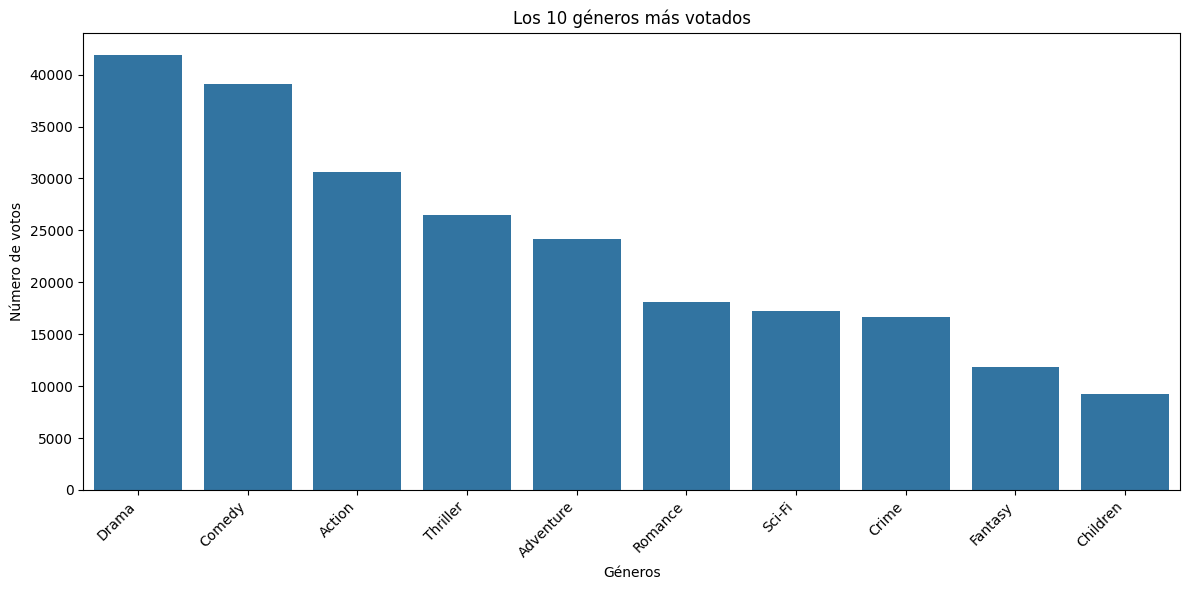

In [33]:

df_limpio = pd.read_csv('movielens_limpio.csv')

# Separo los generos( están en una sola celda)
df_limpio['genres'] = df_limpio['genres'].apply(lambda x: x.split('|'))
df_explode = df_limpio.explode('genres')

# Conteo de votos por género.
conteo_generos = df_explode['genres'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_generos.index, y=conteo_generos.values)

plt.title('Los 10 géneros más votados')
plt.xlabel('Géneros')
plt.ylabel('Número de votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Noeli\AppData\Local\Temp\ipykernel_14860\1035769794.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


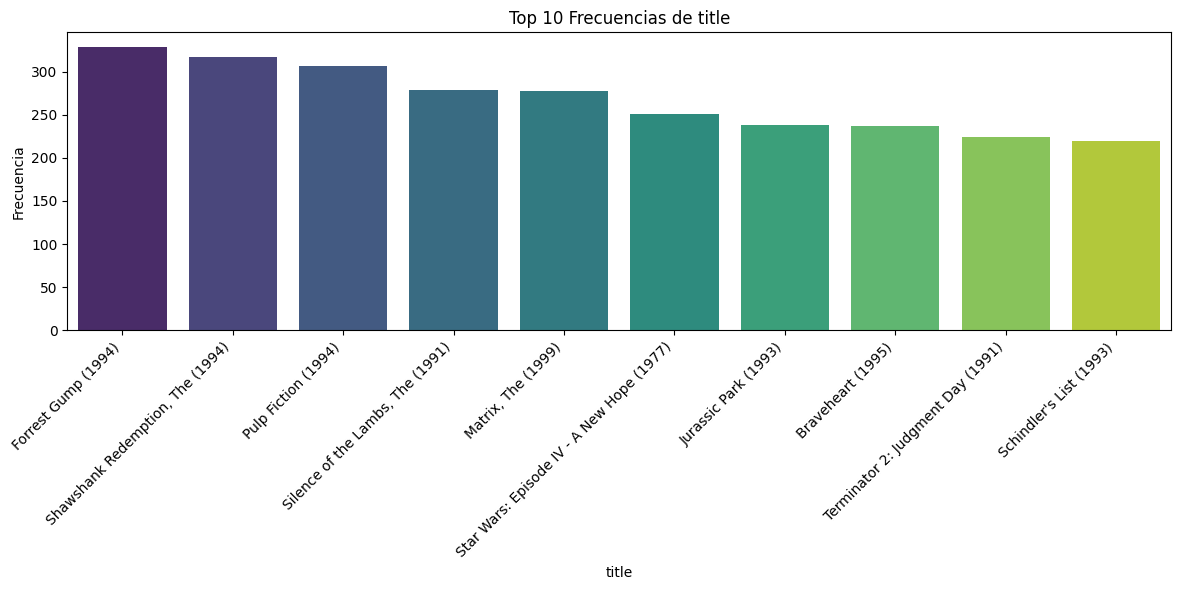

C:\Users\Noeli\AppData\Local\Temp\ipykernel_14860\1035769794.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


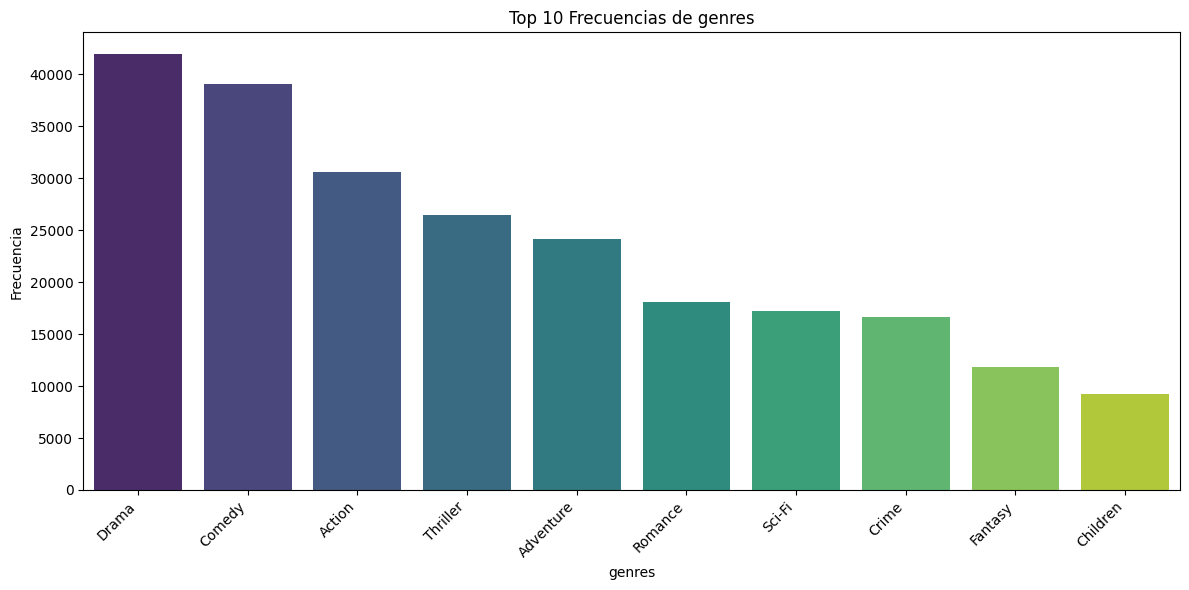

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu archivo limpio
df_limpio = pd.read_csv('movielens_limpio.csv')

# Definir la lista de columnas categóricas que quieres visualizar
col_cat = ['title', 'genres'] 


for columna in col_cat:

    if columna == 'genres':
        
        df_limpio['genres'] = df_limpio['genres'].str.split('|')
        df_explode = df_limpio.explode('genres')
        conteo = df_explode[columna].value_counts().head(10)
    else:
        
        conteo = df_limpio[columna].value_counts().head(10)

 
    plt.figure(figsize=(12, 6))

    sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')

    plt.title(f'Top 10 Frecuencias de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Visualizacion con histogramas (columnas numéricas)

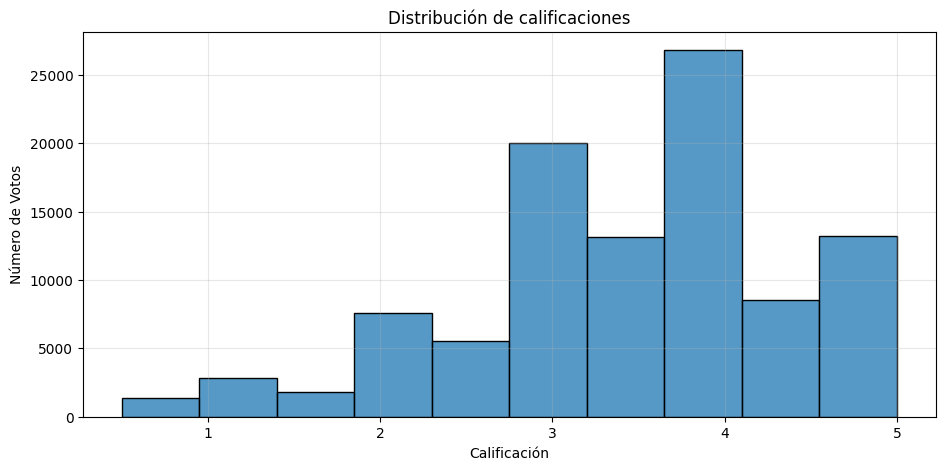

In [36]:

plt.figure(figsize=(11, 5))

sns.histplot(data=df_limpio, x='rating', bins=10)

plt.title('Distribución de calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Número de Votos')
plt.grid(alpha=0.3)
plt.show()

El valor más frecuente y el que más se repite es 4.0.Hay muy pocas calificaciones por debajo del 2.5 se podria decir que los usuarios tienden a dar calificaciones altas .

## Matriz de correlación

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

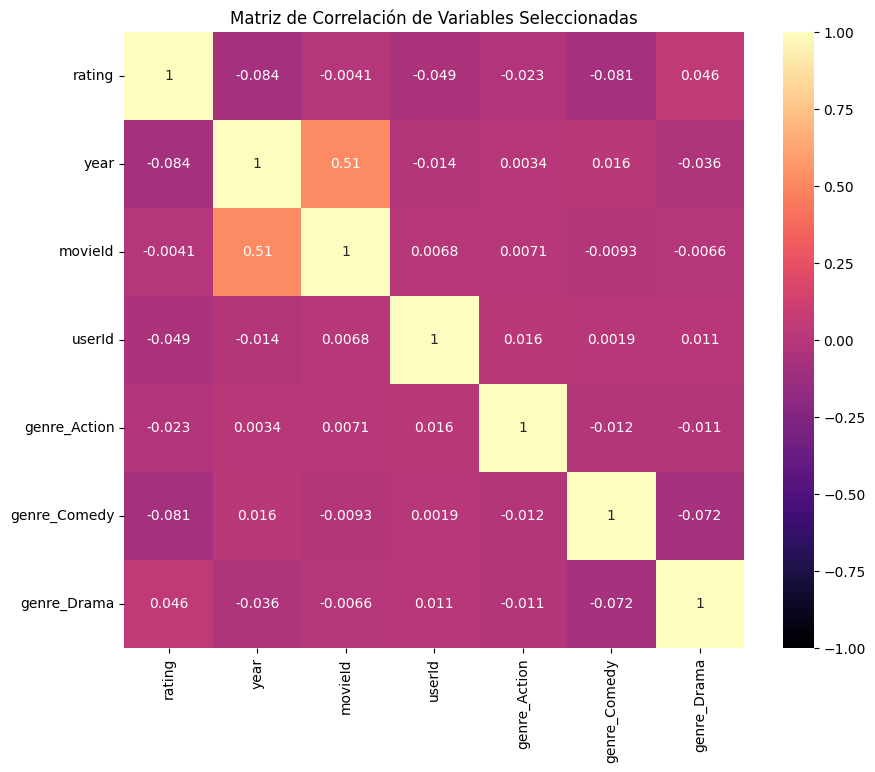

In [ ]:

df_modificado = pd.read_csv('movielens_limpio_con_dummies.csv')

# Variables relevantes 
columnas_para_corr = ['rating', 'year', 'movieId', 'userId']

# Las columnas de género más populares
generos_populares = ['genre_Action', 'genre_Comedy', 'genre_Drama']
columnas_para_corr.extend(generos_populares)

# DataFrame con las columnas seleccionadas
df_corr = df_modificado[columnas_para_corr]

matriz_corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, vmax=1, vmin=-1, cmap='magma')
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()

No hay relaciones inesperadas 

## Relaciones cruzadas

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:


df_limpio = pd.read_csv('movielens_limpio.csv')

df_limpio['genres'] = df_limpio['genres'].str.split('|')
df_explode = df_limpio.explode('genres')

df_relacion = df_explode.groupby('genres')['rating'].mean().reset_index()

df_relacion = df_relacion.sort_values(by='rating', ascending=False)

print("Calificación promedio por género:")
print(df_relacion.head(10))

Calificación promedio por género:
         genres    rating
10    Film-Noir  3.920115
18          War  3.808294
7   Documentary  3.797785
6         Crime  3.658294
8         Drama  3.656184
14      Mystery  3.632460
3     Animation  3.629937
12         IMAX  3.618335
19      Western  3.583938
13      Musical  3.563678


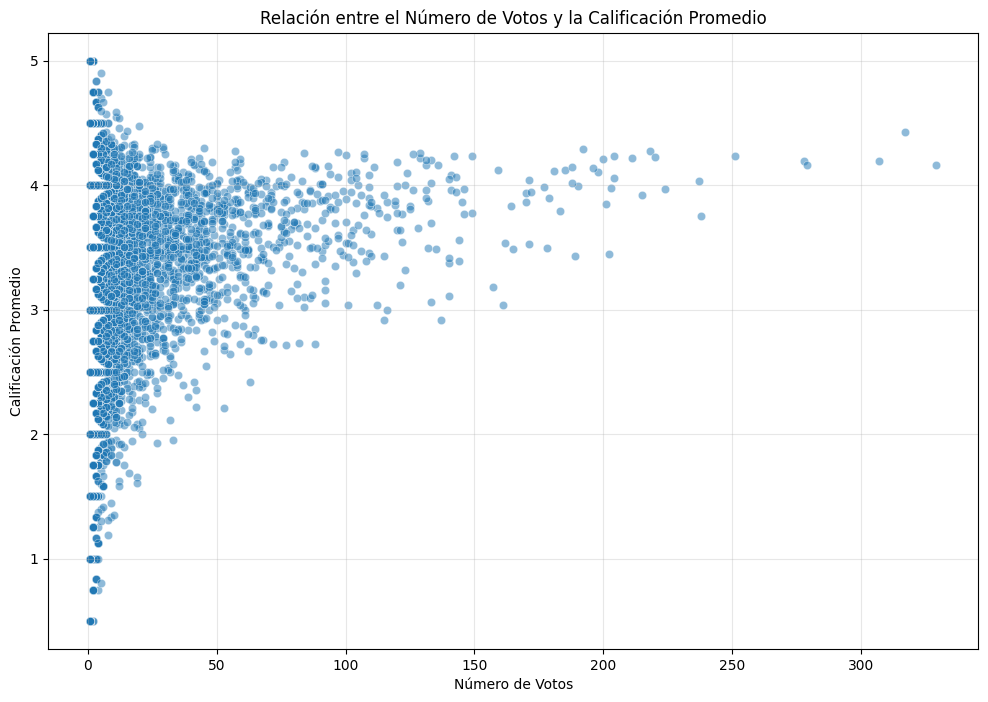

In [16]:


#Agrupar los datos ,obtener calificacion promedio y crear un nuevo Dataframe
df_agrupado = df_limpio.groupby('title').agg(
    calificacion_promedio=('rating', 'mean'),
    numero_votos=('rating', 'count')
).reset_index()

plt.figure(figsize=(12, 8))

sns.scatterplot(x='numero_votos', y='calificacion_promedio', data=df_agrupado, alpha=0.5)


plt.title('Relación entre el Número de Votos y la Calificación Promedio')
plt.xlabel('Número de Votos')
plt.ylabel('Calificación Promedio')
plt.grid(True, alpha=0.3)
plt.show()

La mayoria de los puntos se concentran en el lado izquierdo del gráfico,con menos de 50 votos.Esto nos da una clara idea de que las mayoria de las peliculas en el conjunto de datos no son extremadamente populares n términos de número de calificaciones.

El gráfico muestra que, sin importar el número de votos, la mayoria de las calificaciones se agrupan en un rango de 3 a  4,5.


Este grafico muestra lo mismo que la matriz de correlación,no hay una relación lineal significativa entre estas dos variables.

In [10]:
import pandas as pd


df_limpio = pd.read_csv('movielens_limpio.csv')

# Agrupar para obtener la calificación promedio y el número de votos por película
df_agrupado = df_limpio.groupby('title').agg(
    calificacion_promedio=('rating', 'mean'),
    numero_votos=('rating', 'count')
).reset_index()


# Películas con más de 100 votos y calificación promedio menor a 2.5
filtro = (df_agrupado['numero_votos'] > 100) & (df_agrupado['calificacion_promedio'] < 2.5)


df_filtrado = df_agrupado[filtro]

# Ordenar los resultados para ver las películas con peor calificación
df_filtrado_ordenado = df_filtrado.sort_values(by='calificacion_promedio', ascending=True)

print("Películas populares con calificaciones bajas:")
print(df_filtrado_ordenado.head(10))

Películas populares con calificaciones bajas:
Empty DataFrame
Columns: [title, calificacion_promedio, numero_votos]
Index: []


Las películas que son populares (tienen más de 100 votos) en los datos ,no tienen calificaciones extremadamente bajas.

## Gráfico de caja (Boxplot)

C:\Users\Noeli\AppData\Local\Temp\ipykernel_26748\2277860556.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtrado[col], y=df_filtrado['rating'], order=orden, palette='viridis')


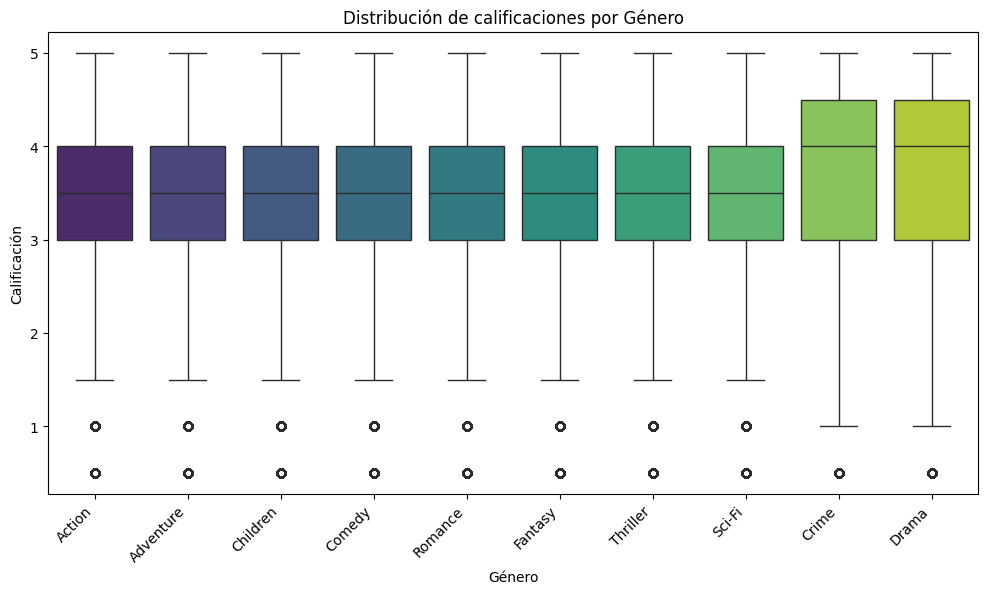

In [54]:
df_explode = df_limpio.copy()
df_explode['genres'] = df_explode['genres'].str.split('|')
df_explode = df_explode.explode('genres')


col_cat = ['genres']

for col in col_cat:
    
    top_10_generos = df_explode[col].value_counts().head(10).index
    df_filtrado = df_explode[df_explode[col].isin(top_10_generos)]
    
    orden = df_filtrado.groupby(col)['rating'].median().sort_values().index

    plt.figure(figsize=(12, 6))
    
    sns.boxplot(x=df_filtrado[col], y=df_filtrado['rating'], order=orden, palette='viridis')
    
    plt.title('Distribución de calificaciones por Género')
    plt.xlabel('Género')
    plt.ylabel('Calificación')
    plt.xticks(rotation=45, ha='right')
    plt.show()

El hecho de que la mayoria de las cajas sean similares en tamaño nos inidca que la mitad de los votos para todos los géneros están en un rango de calificacion similar.

Los puntos indican que hay peliculas que los usuarios calificaron muy mal incluso en generos con calificaciones altas.

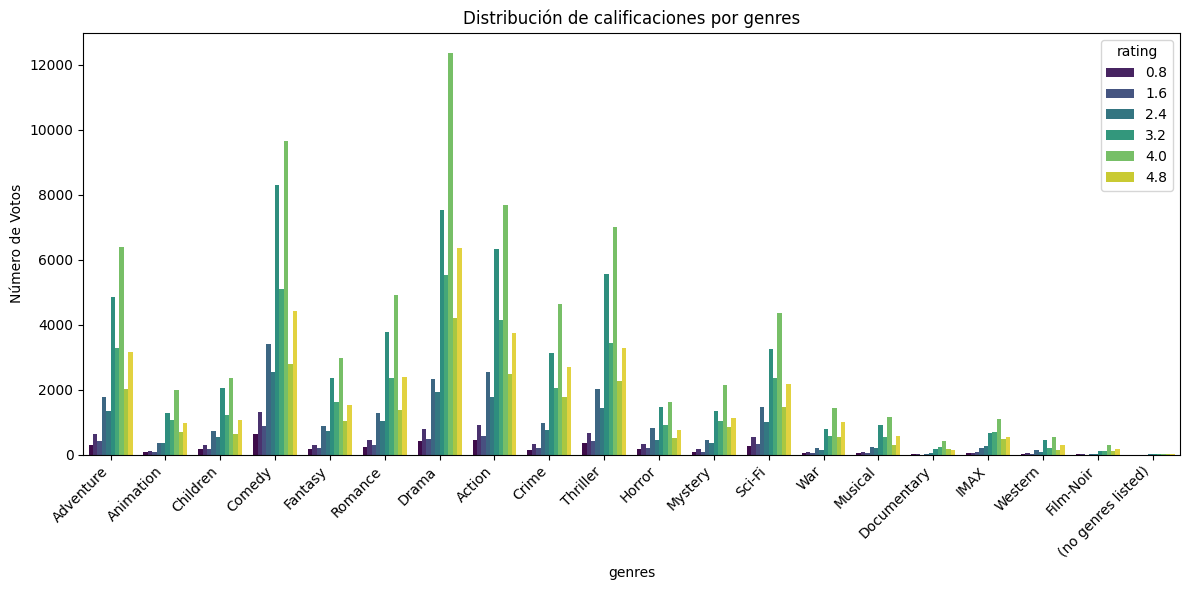

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_limpio = pd.read_csv('movielens_limpio.csv')

# Columnas
col_cat = ['genres']
col_num = ['rating']


df_explode = df_limpio.copy()
df_explode['genres'] = df_explode['genres'].str.split('|')
df_explode = df_explode.explode('genres')

# Definir la variable objetivo
columna_objetivo = 'rating'


for col in col_cat:

    plt.figure(figsize=(12, 6))
    sns.countplot(x=df_explode[col], hue=df_explode[columna_objetivo], palette='viridis')

   
    plt.title(f'Distribución de calificaciones por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Votos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

En casi todos los géneros,domina las calificaciones altas como ya hemos visto anteriormente.Las calificaciones por debajo de 2.5 son muy raras en el conjunto de datos.

Los géneros más populares los encontramos en Drama,Action y Comedy.


In [14]:
import pandas as pd


df_modificado = pd.read_csv('movielens_limpio_con_dummies.csv')

# Guardar el DataFrame a un nuevo archivo CSV
df_modificado.to_csv('datos_dashboard_final.csv', index=False)

In [ ]:
import pandas as pd

# Cargar el DataFrame MÁS tags
df_movielens_unido = pd.read_csv('movielens_limpio.csv')
df_tags = pd.read_csv('tags.csv')

# Se unen
df_movielens_final = pd.merge(df_movielens_unido, df_tags, on='movieId', how='inner')

df_movielens_final.to_csv('datos_dashboard_final.csv', index=False)